In [1]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt


In [2]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

df_DNP = pd.read_csv('DNP-ProductoSector.csv', sep = ',')

df_DNP.head()

,Sector,UnidadMedidaProducto,Indicador,UnidadMedidaIndicador,Producto,Cantidad,MetaIndicador,AvanceIndicador,ValorProducto
0,Interior,Número,Asesorías técnicas realizadas Actualizadas par...,Número,Asesorías técnicas realizadas,1.0,1.0,0.0,15000000.0
1,Inclusión Social Y Reconciliación,Número de personas,Personas vinculadas a empleo formal para pobla...,Número de personas,Servicio de gestión para la colocación de empleo,40.0,40.0,80.0,50208633.0
2,Agricultura Y Desarrollo Rural,Mes,Cadenas productivas apoyadas con recursos,Mes,El proyecto garantiza la asistencia técnica e...,12.0,2.0,0.0,0.0
3,Inclusión Social Y Reconciliación,Número de beneficiarios,Beneficiarios potenciales para quienes se gest...,Número de beneficiarios,Servicio de gestión de oferta social para la p...,3000.0,3000.0,3000.0,18000000.0
4,Cultura,Número de usuarios,Usuarios,Número de usuarios,Servicios bibliotecarios,20788.0,20788.0,0.0,0.0


In [3]:
df_DNP.isnull()

,Sector,UnidadMedidaProducto,Indicador,UnidadMedidaIndicador,Producto,Cantidad,MetaIndicador,AvanceIndicador,ValorProducto
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
372026,False,False,False,False,False,False,False,False,False
372027,False,False,False,False,False,False,False,False,False
372028,False,False,False,False,False,False,False,False,False
372029,False,False,False,False,False,False,False,False,False


In [4]:
df_DNP.dtypes

Sector                    object
UnidadMedidaProducto      object
Indicador                 object
UnidadMedidaIndicador     object
Producto                  object
Cantidad                 float64
MetaIndicador            float64
AvanceIndicador          float64
ValorProducto            float64
dtype: object

In [5]:
df_DNP.Sector.unique()

array(['Interior', 'Inclusión Social Y Reconciliación',
       'Agricultura Y Desarrollo Rural', 'Cultura', 'Educación',
       'Deporte Y Recreación', 'Ambiente Y Desarrollo Sostenible',
       'Transporte', 'Vivienda Ciudad Y Territorio',
       'Gobierno Territorial', 'Salud Y Protección Social',
       'Ciencia Tecnología E Innovación', 'Planeación', 'Minas Y Energía',
       'Trabajo', 'Comercio Industria Y Turismo',
       'Presidencia De La República', 'Empleo Público',
       'Justicia Y Del Derecho', 'Información Estadística', 'Hacienda',
       'Tecnologías De La Información Y Las Comunicaciones',
       'Organismos De Control', 'Fiscalía', 'Rama Judicial',
       'Registraduría', 'Congreso De La República',
       'Relaciones Exteriores',
       'Sistema Integral De Verdad Justicia Reparación Y No Repetición'],
      dtype=object)

In [6]:
df_DNP.Sector.value_counts()

Transporte                                                        44369
Inclusión Social Y Reconciliación                                 37277
Salud Y Protección Social                                         35557
Vivienda Ciudad Y Territorio                                      35329
Educación                                                         35243
Gobierno Territorial                                              28358
Agricultura Y Desarrollo Rural                                    23933
Ambiente Y Desarrollo Sostenible                                  21367
Deporte Y Recreación                                              20572
Cultura                                                           19035
Ciencia Tecnología E Innovación                                   10780
Minas Y Energía                                                    9913
Comercio Industria Y Turismo                                       9808
Planeación                                                      

<Axes: title={'center': 'Muestra General'}, xlabel='Sectores', ylabel='Inversión DNP'>

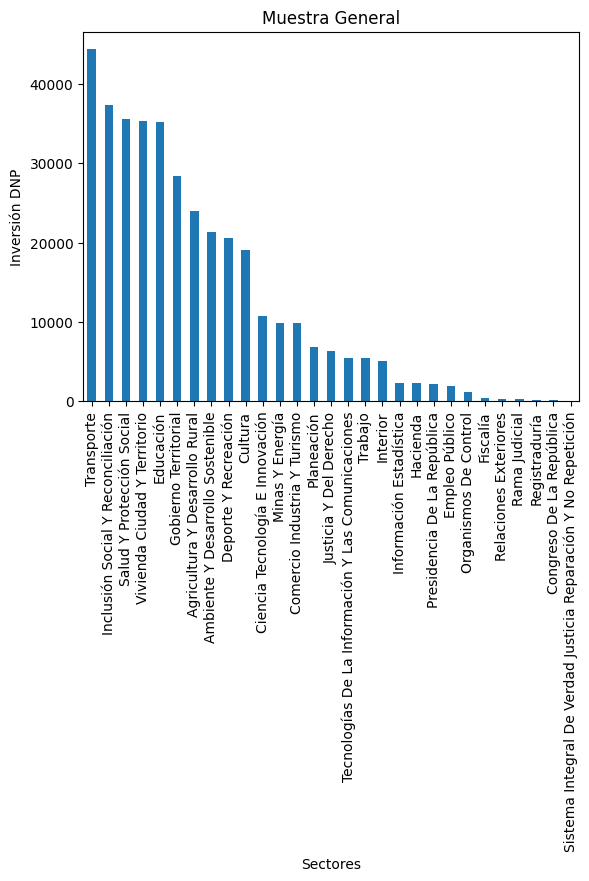

In [7]:
#Evaluaciòn poblaciòn sector, selecciona las veces que aparece cada sector único y se ordena de mayor a menor frecuencia

df_DNP['Sector'].value_counts().iloc[:29].plot(kind='bar', xlabel='Sectores', ylabel='Inversión DNP',title='Muestra General')


In [8]:
plt.savefig("Muestra General.pdf", format="pdf")

<Figure size 640x480 with 0 Axes>

<Axes: title={'center': 'Selección muestreo'}, xlabel='Sectores escogidos', ylabel='Inversión DNP'>

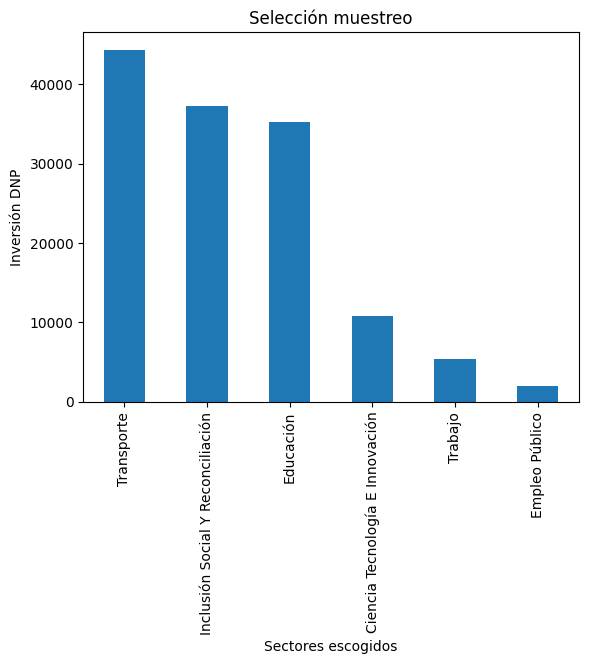

In [9]:
# crear una lista de valores únicos de la columna "Sector"
sectores = ['Transporte', 'Educación', 'Trabajo', 'Ciencia Tecnología E Innovación','Inclusión Social Y Reconciliación', 'Empleo Público']

# seleccionar solo las filas de df_DNP que contienen los valores de la lista "sectores"
df_sectores = df_DNP.loc[df_DNP['Sector'].isin(sectores)]

# trazar el gráfico de barras con los datos seleccionados
df_sectores['Sector'].value_counts().plot(kind='bar', xlabel='Sectores escogidos', ylabel='Inversión DNP', title='Selección muestreo')

In [10]:
plt.savefig("Sectores Escogidos.pdf", format="pdf")

<Figure size 640x480 with 0 Axes>

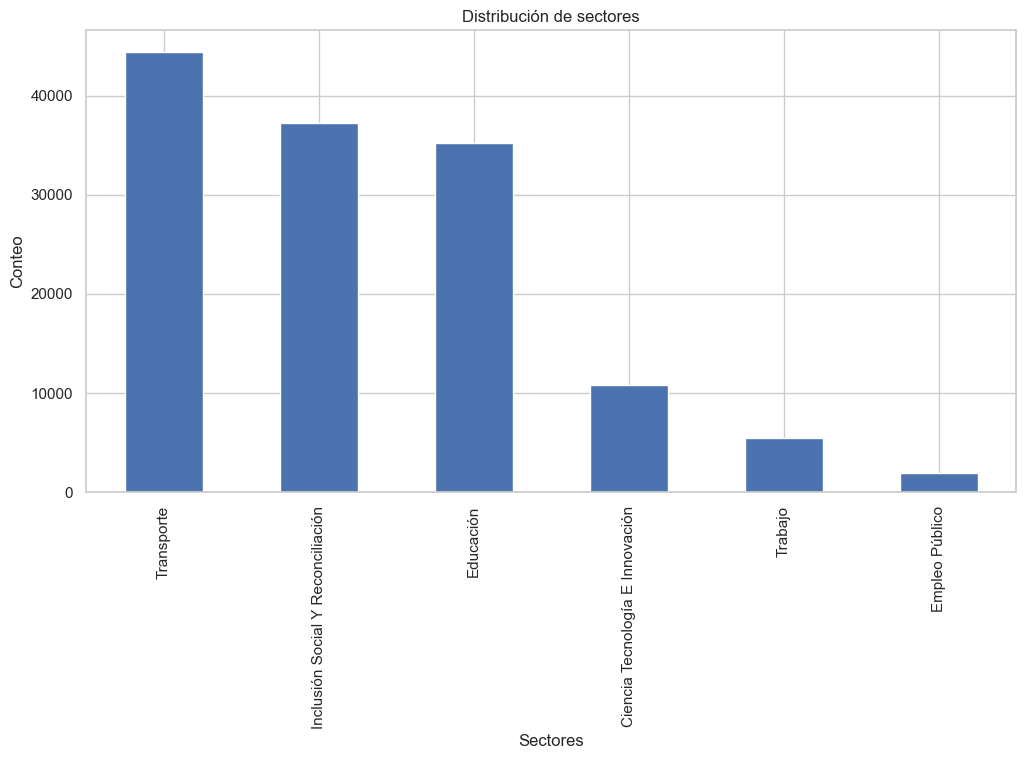

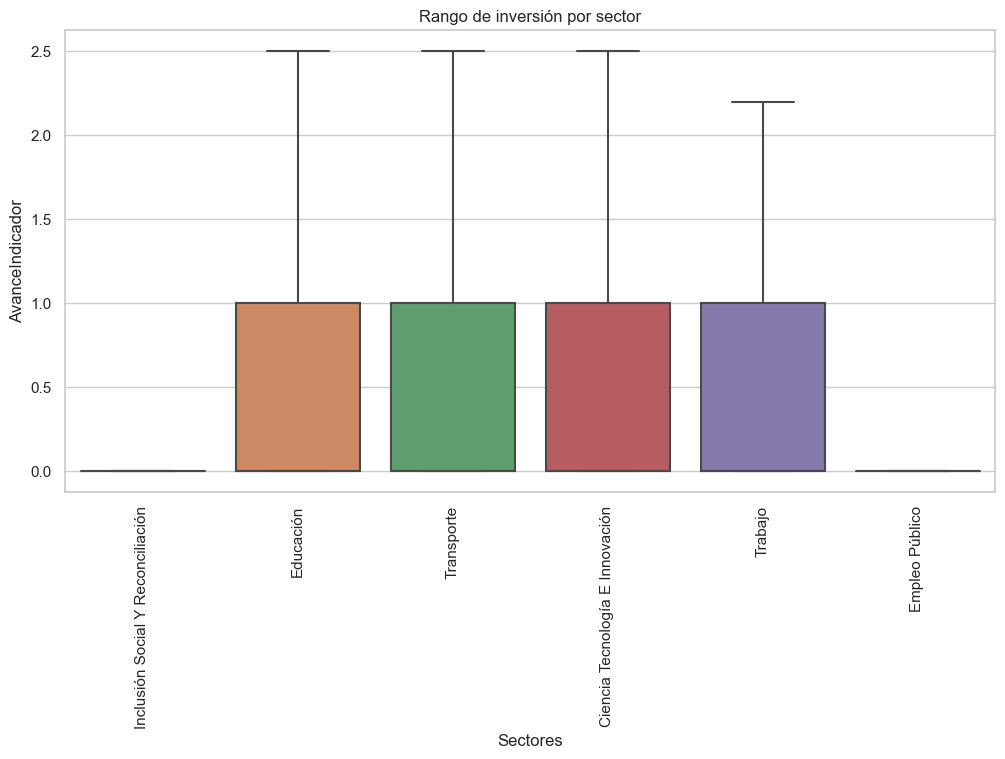

In [11]:
import seaborn as sns 
import matplotlib.pyplot as plt

sns.set(style="whitegrid")


# Filtrar el DataFrame original
df_sectores = df_DNP.loc[df_DNP['Sector'].isin(sectores)]

# Seleccionar las columnas de interés
df_subset = df_sectores[['Sector', 'AvanceIndicador']]

# Visualizar la cuenta de sectores en un gráfico de barras
plt.figure(figsize=(12, 6))
df_sectores['Sector'].value_counts().plot(kind='bar')
plt.xlabel('Sectores')
plt.ylabel('Conteo')
plt.title('Distribución de sectores')
plt.xticks(rotation=90)
plt.show()

# Visualizar el rango de inversión por sector en un gráfico de caja
plt.figure(figsize=(12, 6))
sns.boxplot(x='Sector', y='AvanceIndicador', data=df_sectores, showfliers=False)
plt.title('Rango de inversión por sector')
plt.xlabel('Sectores')
plt.ylabel('AvanceIndicador')
plt.xticks(rotation=90)
plt.show()


#Mediante el análisis exploratorio de los datos contenidos en el conjunto de datos 'DNP-ProductoSector', pude determinar la distribución de la inversión 
#del Departamento Nacional de Planeación (DNP) en diferentes sectores de la economía colombiana. Al seleccionar un subconjunto de los sectores, pude 
#observar mediante un gráfico de caja que el rango de inversión varía ampliamente entre los sectores seleccionados. Por otro lado, al analizar la gráfica
#Boxplot, me indica que puntea más alto en el Sistema Integral y la frecuencia más alta, según el diagrama de barra puntea más alto el Sector Transporte,  
#Repetición' presenta una frecuencia mayor. Sin embargo, me surgió la pregunta de por qué este sector presenta un avance indicador más alto que los 
#lo cual requiere una investigación más profunda.

In [12]:
plt.savefig("Rango de Inversión.pdf", format="pdf")

<Figure size 640x480 with 0 Axes>

In [13]:
import matplotlib.pyplot as plt
import pandas as pd 

df_DNP = pd.read_csv('DNP-ProductoSector.csv', sep = ',')

df_DNP.head()

df_DNP.AvanceIndicador.value_counts()

0.0000         269517
1.0000          24464
2.0000           6195
3.0000           3258
4.0000           2600
                ...  
135369.0000         1
24036.3000          1
14436.0000          1
2.7818              1
199.9600            1
Name: AvanceIndicador, Length: 12635, dtype: int64

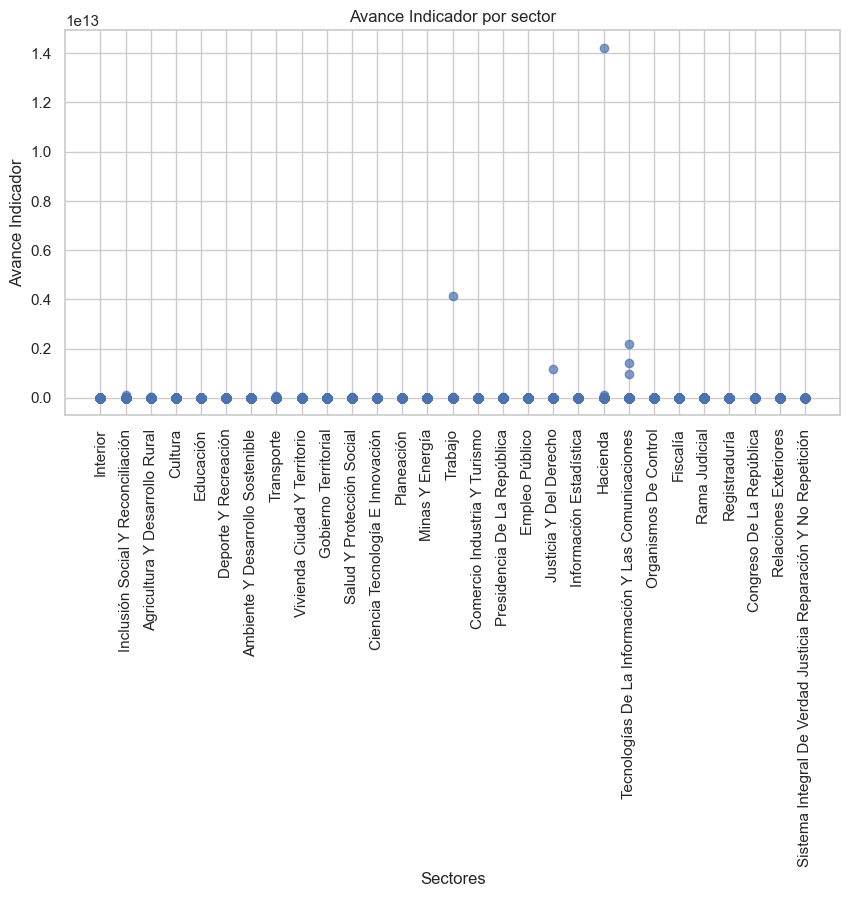

In [14]:
import matplotlib.pyplot as plt
import pandas as pd 


df_DNP = pd.read_csv('DNP-ProductoSector.csv', sep = ',')

sectores = df_DNP['Sector'].tolist()
df_Avance_Indicador = df_DNP['AvanceIndicador'].tolist()

fig, ax = plt.subplots()
ax.scatter(sectores, df_Avance_Indicador, alpha=0.7,color='b')
ax.set_title('Avance Indicador por sector')
ax.set_xlabel('Sectores')
ax.set_ylabel('Avance Indicador')
fig.set_size_inches(10, 5) 
plt.xticks(rotation=90)
plt.show()

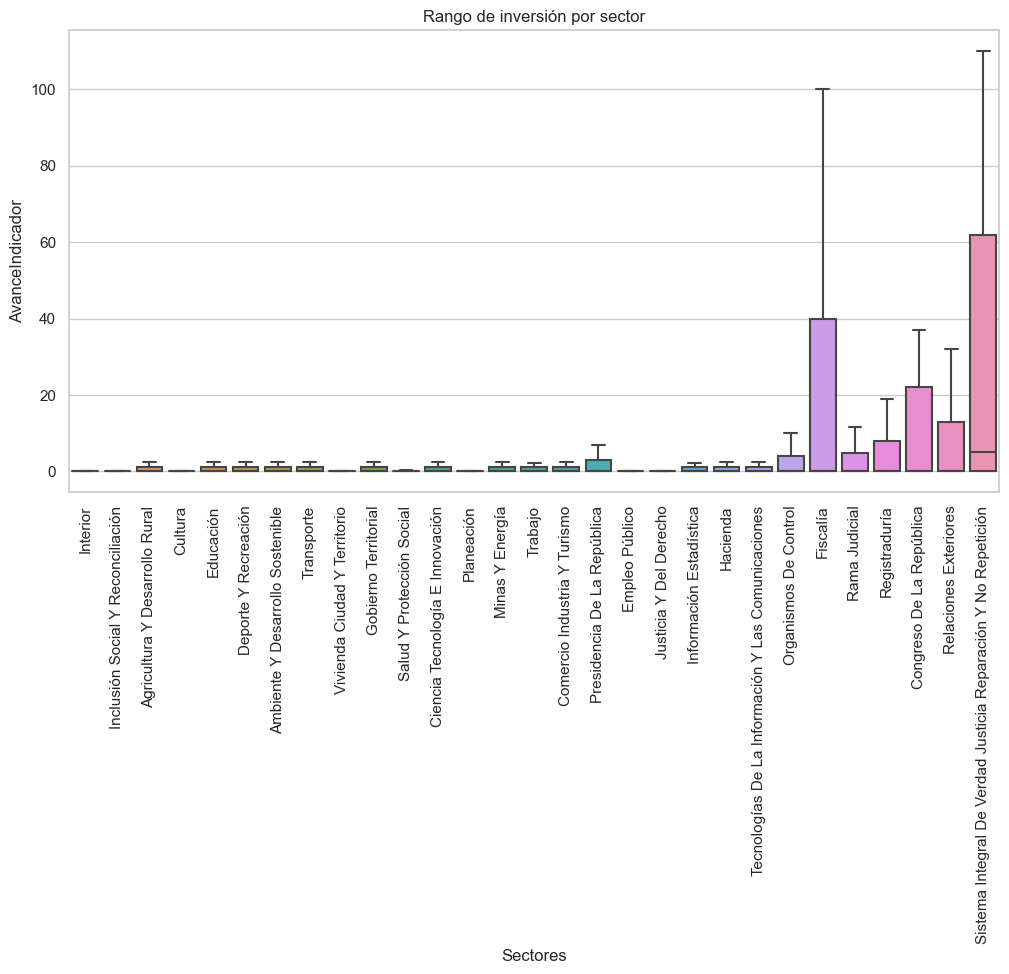

In [15]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Sector', y='AvanceIndicador', data=df_DNP, showfliers=False)
plt.title('Rango de inversión por sector')
plt.xlabel('Sectores')
plt.ylabel('AvanceIndicador')
plt.xticks(rotation=90)
plt.show()

In [16]:
plt.savefig("Avance Indicador por Sector.pdf", format="pdf")

<Figure size 640x480 with 0 Axes>

In [17]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
import pandas as pd


In [18]:
#Atributos
import pandas as pd

df_DNP = pd.read_csv('DNP-ProductoSector.csv', sep=',')
df_encoded = pd.get_dummies(df_DNP)

# Normalizar variables numéricas
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_encoded), columns=df_encoded.columns)

: 

: 